In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data_dir = '/kaggle/input/garbage-classification-v2/Garbage Classification'

# Define the list of classes
classes = os.listdir(data_dir)
print(classes)

['metal', 'glass', 'biological', 'paper', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic']


In [4]:
# Define data augmentation and preprocessing for the dataset
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
input_size = (256, 256)
batch_size = 32

# Load the dataset and split it into train, validation, and test sets
train_ds = datagen.flow_from_directory(data_dir, target_size=input_size, batch_size=batch_size, subset='training')
val_ds = datagen.flow_from_directory(data_dir, target_size=input_size, batch_size=batch_size, subset='validation')
test_ds = datagen.flow_from_directory(data_dir, target_size=input_size, batch_size=batch_size, subset='validation')


Found 15393 images belonging to 10 classes.
Found 6591 images belonging to 10 classes.
Found 6591 images belonging to 10 classes.


In [5]:
# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5.5e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [6]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=8)

Epoch 1/8
392/482 [=======================>......] - ETA: 29s - loss: 0.2726 - accuracy: 0.9166

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


482/482 [==============================] - 253s 421ms/step - loss: 0.2467 - accuracy: 0.9249 - val_loss: 2.3251 - val_accuracy: 0.2881
Epoch 2/8
482/482 [==============================] - 137s 285ms/step - loss: 0.0443 - accuracy: 0.9874 - val_loss: 0.7898 - val_accuracy: 0.7847
Epoch 3/8
482/482 [==============================] - 134s 277ms/step - loss: 0.0322 - accuracy: 0.9914 - val_loss: 0.3501 - val_accuracy: 0.9047
Epoch 4/8
482/482 [==============================] - 135s 280ms/step - loss: 0.0177 - accuracy: 0.9956 - val_loss: 0.4268 - val_accuracy: 0.8939
Epoch 5/8
482/482 [==============================] - 133s 277ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.6241 - val_accuracy: 0.8553
Epoch 6/8
482/482 [==============================] - 136s 282ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.4802 - val_accuracy: 0.8886
Epoch 7/8
482/482 [==============================] - 136s 281ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.6429 - val_accuracy: 0.

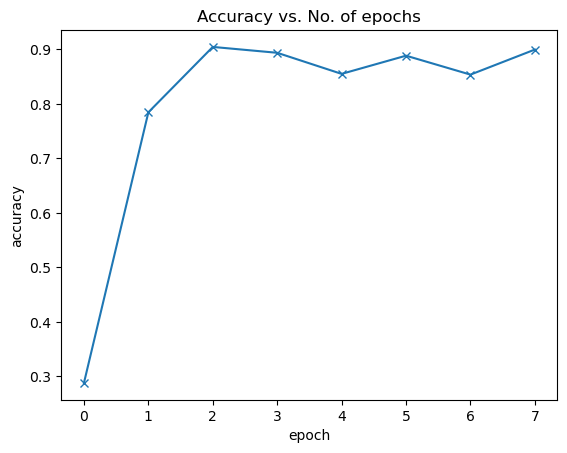

In [9]:
import matplotlib.pyplot as plt
# Plot accuracies
def plot_accuracies(history):
    plt.plot(history.history['val_accuracy'], '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

plot_accuracies(history)




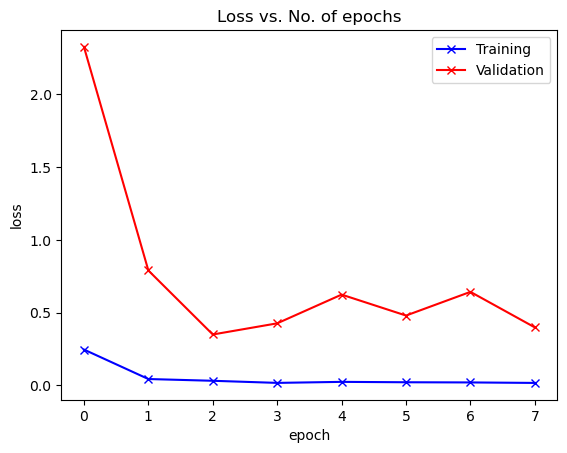

In [10]:
# Plot losses
def plot_losses(history):
    plt.plot(history.history['loss'], '-bx')
    plt.plot(history.history['val_loss'], '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

plot_losses(history)


In [11]:
# Calculate and display the test accuracy
test_loss, test_accuracy = model.evaluate(test_ds)
print('Test Accuracy:', test_accuracy)

206/206 [==============================] - 22s 106ms/step - loss: 0.3987 - accuracy: 0.8999
Test Accuracy: 0.8998634219169617
